<a href="https://colab.research.google.com/github/sotetsuk/LectureColab/blob/main/gp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

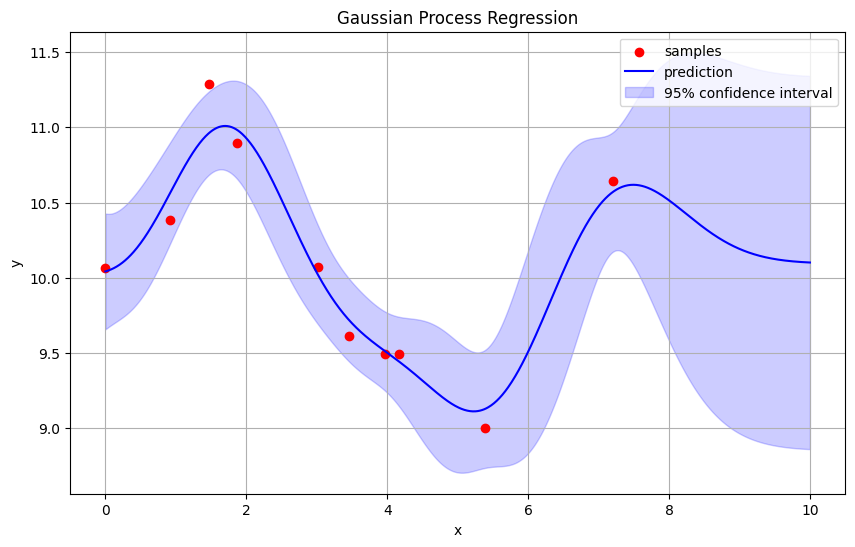

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# 1. 訓練データの生成
rng = np.random.RandomState(1)
X = rng.uniform(0, 10, 10).reshape(-1, 1)
y = np.sin(X).ravel() + rng.normal(0, 0.2, X.shape[0]) + 10

# 2. ガウス過程回帰モデルの構築と学習
# カーネルを定義: RBFカーネルは滑らかな関数を仮定する一般的なカーネル
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# ガウス過程回帰モデルのインスタンスを作成
# n_restarts_optimizer > 0 とすることで、より良いカーネルのハイパーパラメータを見つけやすくなる
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

# モデルの学習
gp.fit(X, y)

# 3. 予測の実行
x_pred = np.linspace(0, 10, 1000).reshape(-1, 1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

# 4. 結果のプロット
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='red', marker='o', label='samples', zorder=2)
plt.plot(x_pred, y_pred, 'b-', label='prediction')
plt.fill_between(x_pred.ravel(),
                 y_pred - 1.96 * sigma,
                 y_pred + 1.96 * sigma,
                 alpha=0.2, color='blue', label='95% confidence interval')
plt.title('Gaussian Process Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()